In [52]:
import os
import glob
import pickle
import sys  

sys.path.insert(0, '../py')
from graviti import *

import numpy as np
import pandas as pd

from  matplotlib import pyplot
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import seaborn

import umap

import warnings
warnings.filterwarnings('ignore')

In [103]:
def classify(df_2d,tissue,umap_nn):
    n_neighbors = 15

    # we only take the first two features. We could avoid this ugly
    # slicing by using a two-dim dataset
    X = df_2d[['x','y']].to_numpy()
    y = df_2d.target

    # Create color maps
    cmap = ListedColormap(['grey','blue'])
    
    for weights in ['distance']: #['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X, y)

        plt.figure(figsize=(15,15))
        
        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], 
                    c=y, cmap=cmap,
                    alpha=0.5,
                    #edgecolor='k', 
                    s=20)
        plt.xlim(X[:, 0].min()-1.0, X[:, 0].max()+1.0)
        plt.ylim(X[:, 1].min()-1.0, X[:, 1].max()+1.0)
        #plt.title("3-Class classification (k = %i, weights = '%s')"
        plt.savefig(str(tissue)+'_'+str(umap_nn)+'.png')
    
    plt.show()
    return

In [54]:
# Load the data
data = np.load('../py/covd_barycenters.npy')
filename = 'list_of_cancerID.pkl'
infile = open(filename,'rb')
target = pickle.load(infile)
infile.close()
print(data.shape,len(target))

(5094, 36) 5094


In [53]:
# build the dataframe
#df = pd.DataFrame([[data[s]] for s in range(data.shape[0])], columns=['predictor'])
#df['target'] = target

LUSC


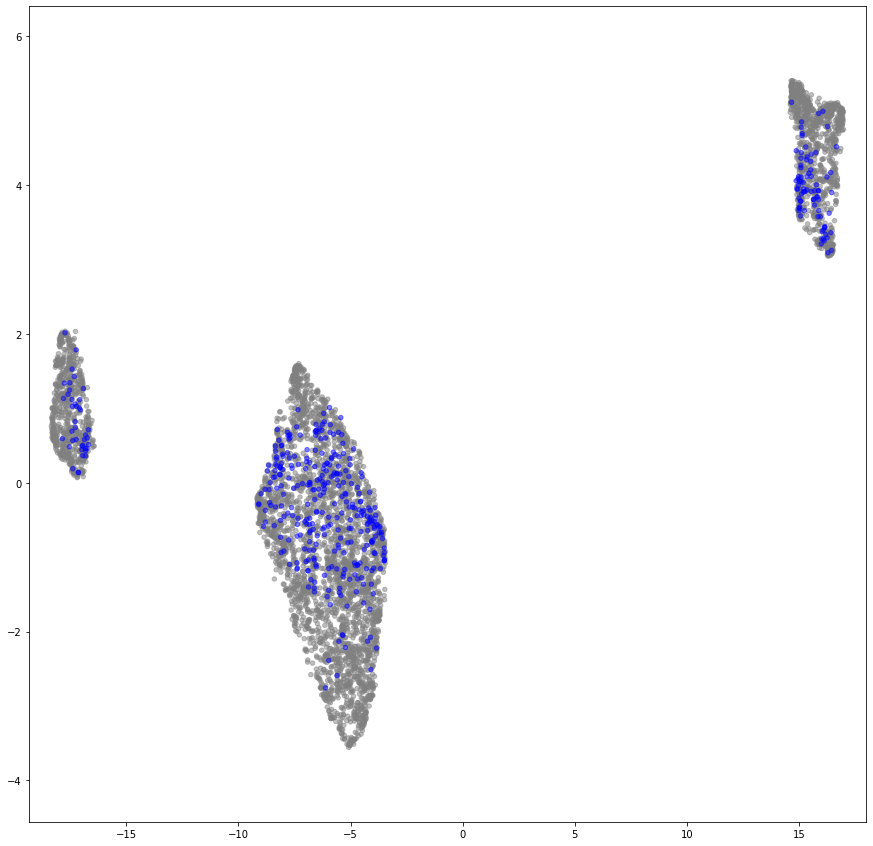

GBM


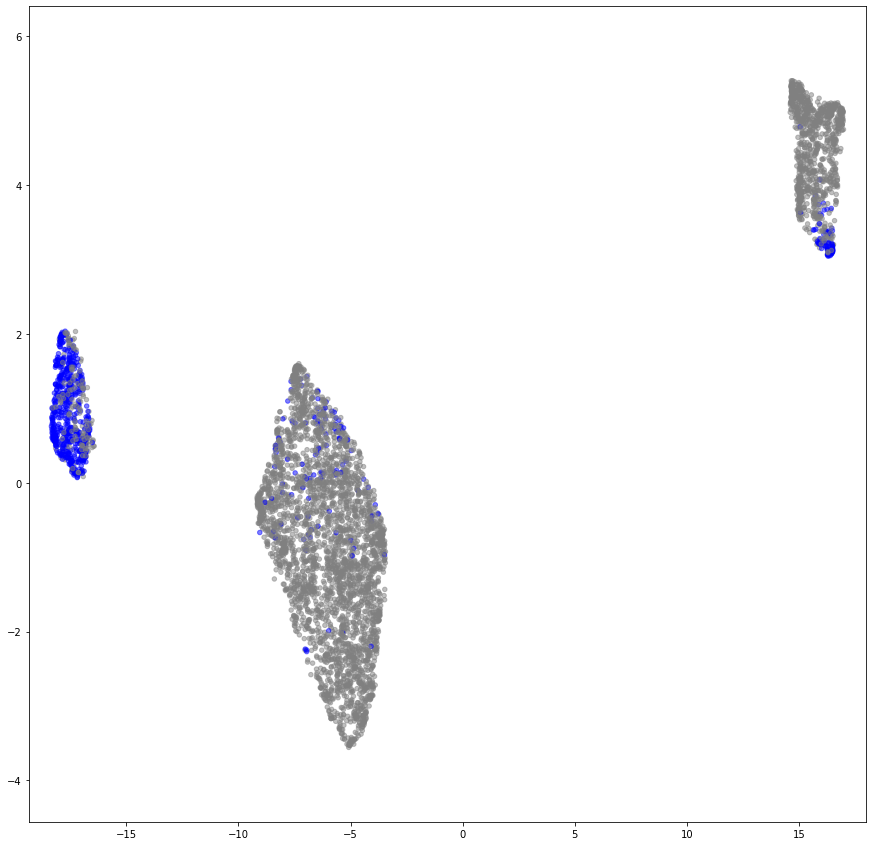

UCEC


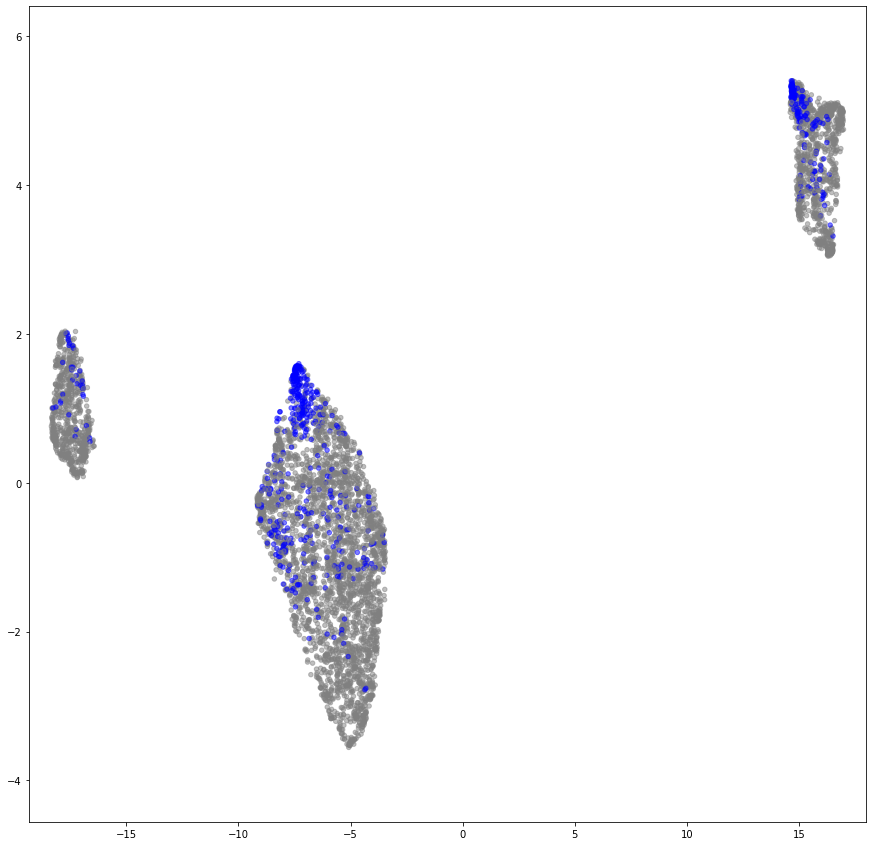

CESC


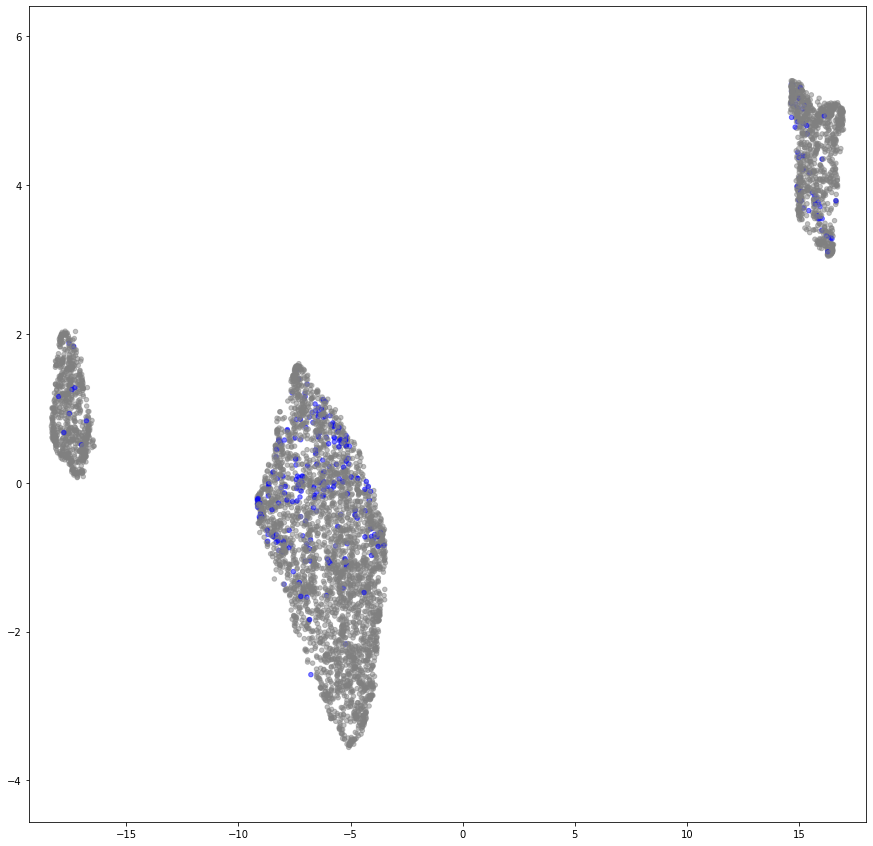

BLCA


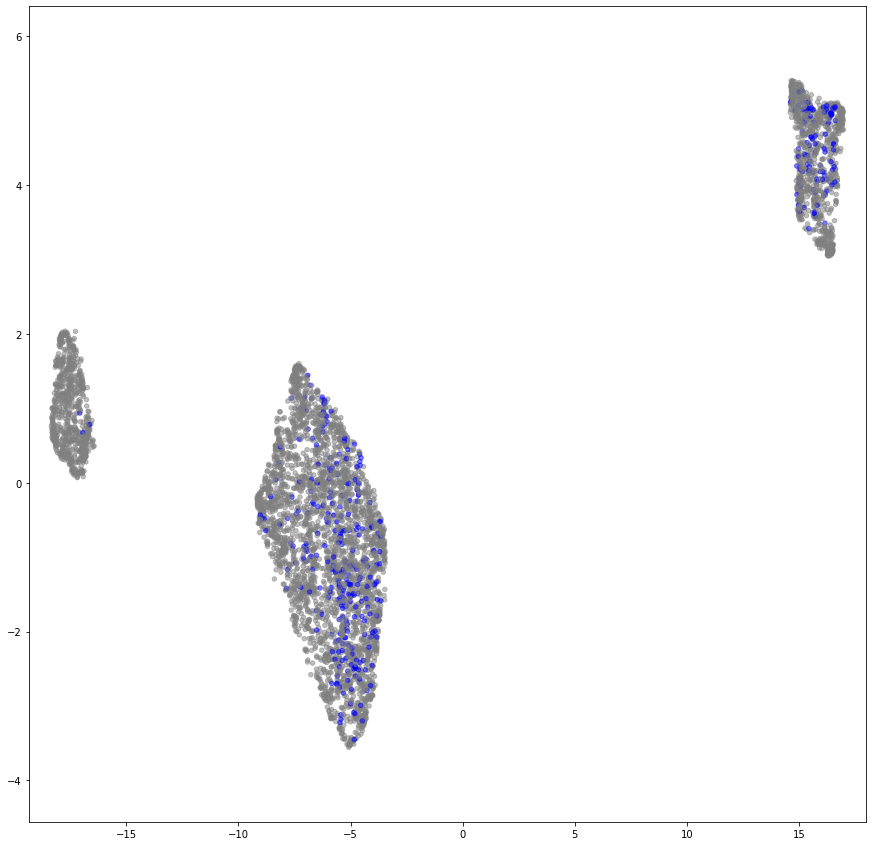

PRAD


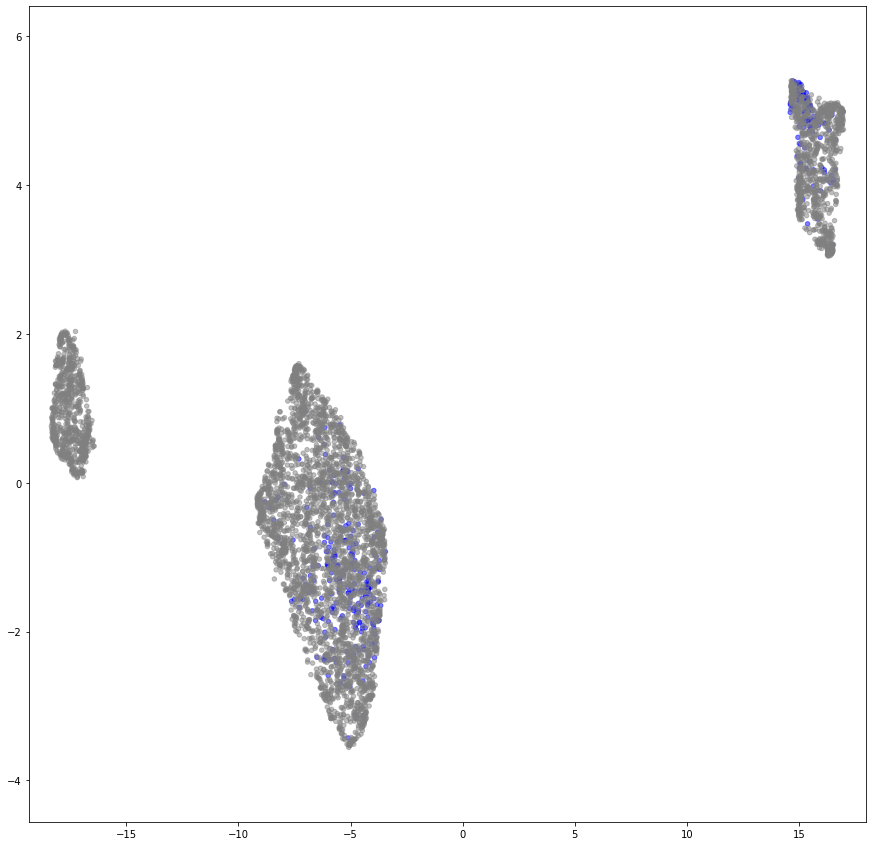

LUAD


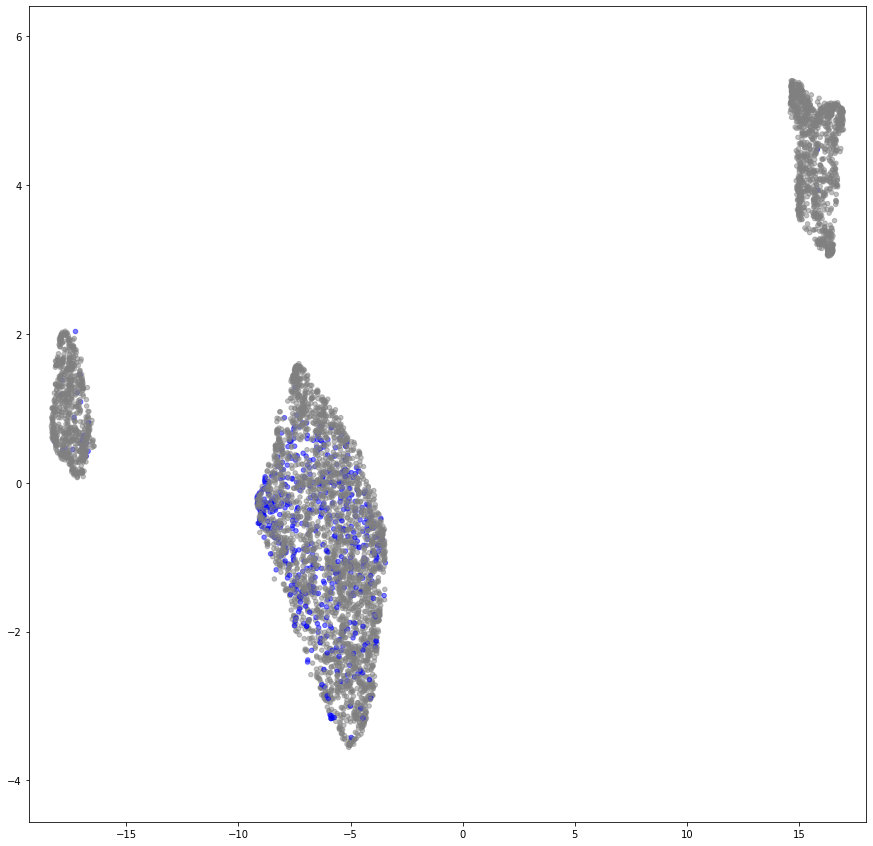

SKCM


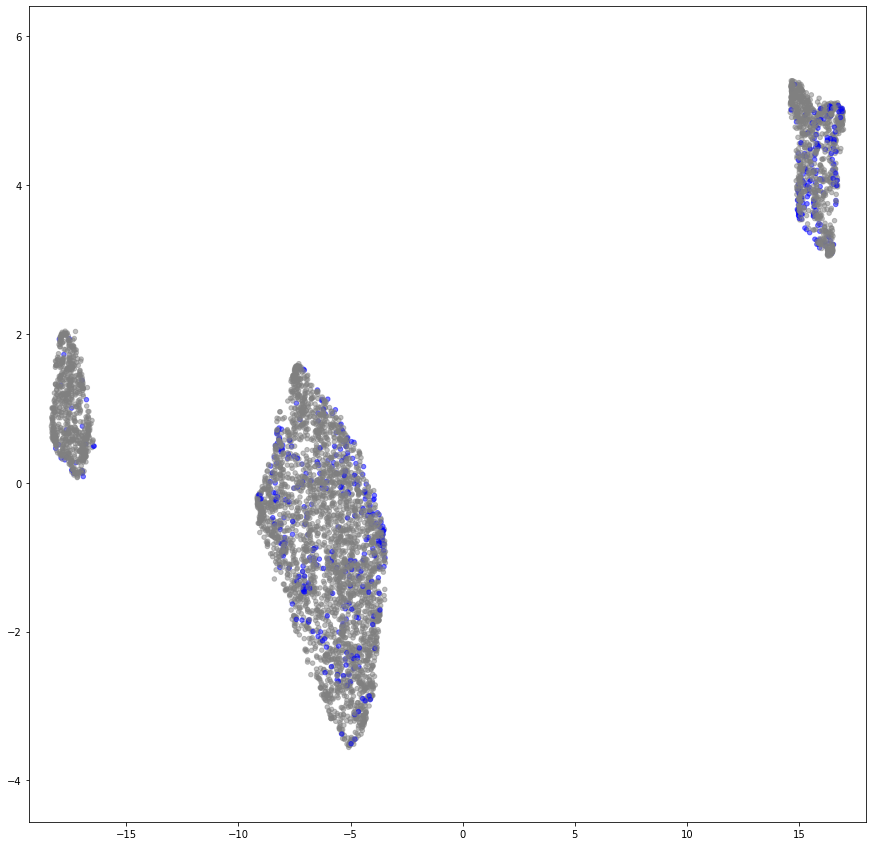

BRCA


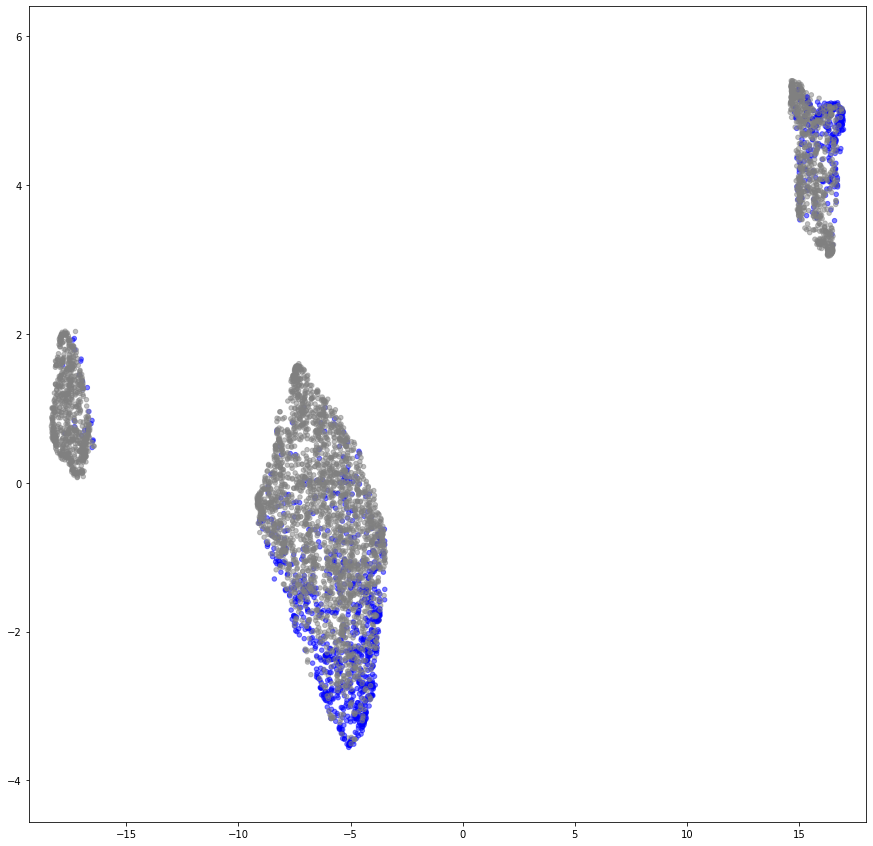

PAAD


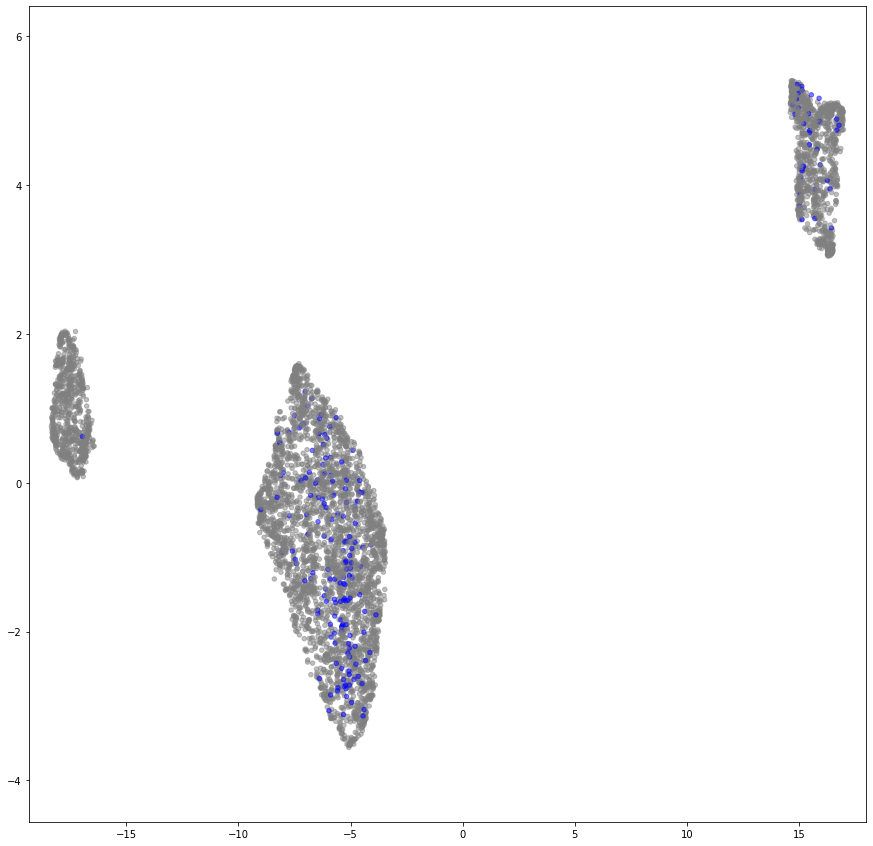

In [105]:
# Project to lowD
umap_nn = 200
min_dist = 0
reducer = umap.UMAP(n_components=2, n_neighbors=umap_nn, min_dist=min_dist)
embedding = reducer.fit_transform(data)

# Define dataframe in lowD
df_2d =  pd.DataFrame(dict(x=embedding[:,0], y=embedding[:,1], label=target))

for tissue in list(set(df_2d.label))[:]:
    print(tissue)
    df_2d['target'] = [ df_2d.label.to_list()[s] == tissue for s in range(df_2d.shape[0]) ]
    
    classify(df_2d, tissue, umap_nn)